In [90]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math
dataV1= pd.read_csv(r"C:\Users\Rohit\Downloads\TrainingDatasetV3.csv",encoding = "latin1")
dataV1.head()

,Unnamed: 0,ID,Birth Year,Gender Flag,Skillset1,Skillset1 Weight,Skillset2,Skillset2 Weight,City of profile,Country of profile,...,Company,Company_Norm,Ticker,Exchange,Location,Industry,Layoff Date,Company Name,Employees Affected,laid_off
0,0,6b89d91d-7b71-37fe-bb4c-0084018d63c0,2001,0,Software Engineering,0.570285,Web Development,0.277136,San Ramon,United States,...,VMware,VMware,VMW,XNYS,"san francisco, ca",Computer Systems Design,3/12/2018,"VMware, Inc",159,0.0
1,1,6b89d91d-7b71-37fe-bb4c-0084018d63c0,2001,0,Software Engineering,0.570285,Web Development,0.277136,San Ramon,United States,...,VMware,VMware,VMW,XNYS,"san francisco, ca",Computer Systems Design,3/28/2016,"VMware, Inc",170,0.0
2,11,a8dc3d34-5108-365a-9625-6711be684d92,1979,0,Software Engineering,0.949158,Electrical Engineering,0.033769,San Francisco,United States,...,Cisco Systems,Cisco Systems,CSCO,XNAS,NaN,Carrier equipment,1/17/2017,"Cisco Systems, Inc.",25,0.0
3,12,a8dc3d34-5108-365a-9625-6711be684d92,1979,0,Software Engineering,0.949158,Electrical Engineering,0.033769,San Francisco,United States,...,Cisco Systems,Cisco Systems,CSCO,XNAS,NaN,Carrier equipment,1/20/2016,"Cisco Systems, Inc.",123,0.0
4,13,a8dc3d34-5108-365a-9625-6711be684d92,1979,0,Software Engineering,0.949158,Electrical Engineering,0.033769,San Francisco,United States,...,Cisco Systems,Cisco Systems,CSCO,XNAS,NaN,Carrier equipment,10/10/2014,"Cisco Systems, Inc.",1005,0.0


In [3]:
dataV1.columns

Index(['Unnamed: 0', 'ID', 'Birth Year', 'Gender Flag', 'Skillset1',
       'Skillset1 Weight', 'Skillset2', 'Skillset2 Weight', 'City of profile',
       'Country of profile', 'Education', 'Elite Institution', 'Start Date',
       'StartFlag', 'End Date', 'EndFlag', 'CurrentEmployFlag', 'Length',
       'Role', 'Dept', 'Company', 'Company_Norm', 'Ticker', 'Exchange',
       'Location', 'Industry', 'Layoff Date', 'Company Name',
       'Employees Affected', 'laid_off'],
      dtype='object')

In [91]:
# use one-hot encoding to encode skillsets
encodeSkill1 = pd.get_dummies(dataV1['Skillset1'], prefix = 's1', prefix_sep='-')
encodeSkill2 = pd.get_dummies(dataV1['Skillset2'], prefix = 's2', prefix_sep='-') 
dataV1 = dataV1.join(encodeSkill1) 
dataV1 = dataV1.join(encodeSkill2)
dataV1 = dataV1.drop(['Skillset1','Skillset2'], axis = 1)
dataV1.head()

,Unnamed: 0,ID,Birth Year,Gender Flag,Skillset1 Weight,Skillset2 Weight,City of profile,Country of profile,Education,Elite Institution,...,s2-Product Management,s2-Public Policy,s2-Real Estate,s2-Retail and Fashion,s2-Sales,s2-Social Media and Communications,s2-Software Engineering,s2-Video and Film Production,s2-Web Design,s2-Web Development
0,0,6b89d91d-7b71-37fe-bb4c-0084018d63c0,2001,0,0.570285,0.277136,San Ramon,United States,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,6b89d91d-7b71-37fe-bb4c-0084018d63c0,2001,0,0.570285,0.277136,San Ramon,United States,0,0,...,0,0,0,0,0,0,0,0,0,1
2,11,a8dc3d34-5108-365a-9625-6711be684d92,1979,0,0.949158,0.033769,San Francisco,United States,4,0,...,0,0,0,0,0,0,0,0,0,0
3,12,a8dc3d34-5108-365a-9625-6711be684d92,1979,0,0.949158,0.033769,San Francisco,United States,4,0,...,0,0,0,0,0,0,0,0,0,0
4,13,a8dc3d34-5108-365a-9625-6711be684d92,1979,0,0.949158,0.033769,San Francisco,United States,4,0,...,0,0,0,0,0,0,0,0,0,0


In [460]:
query.columns

Index(['Birth Year', 'Gender Flag', 'Skillset1 Weight', 'Skillset2 Weight',
       'Education', 'Elite Institution', 'Length', 'Employees Affected',
       's1-Administration', 's1-Business Development', 's1-Data Analysis',
       's1-Design', 's1-Digital Marketing', 's1-Electrical Engineering',
       's1-Energy, Oil, and Gas', 's1-Finance', 's1-Healthcare',
       's1-Hospitality', 's1-Human Resources', 's1-IT Management and Support',
       's1-Industrial Management', 's1-Insurance', 's1-Legal', 's1-Logistics',
       's1-Manufacturing and Process Management', 's1-Military',
       's1-Mobile Telecommunications', 's1-Musical Production',
       's1-Non-Profit and Community', 's1-Operations Management',
       's1-Product Management', 's1-Public Policy', 's1-Real Estate',
       's1-Retail and Fashion', 's1-Sales',
       's1-Social Media and Communications', 's1-Software Engineering',
       's1-Video and Film Production', 's1-Web Design', 's1-Web Development',
       's2-Administra

In [92]:
dataV1 = dataV1.dropna(subset=['laid_off'])


In [93]:
dataV1 = dataV1[dataV1['Birth Year' ]!= 'None']
dataV1['Birth Year'] = dataV1['Birth Year'].astype(float) #Convert from string to float to work for regression

dataV1 = dataV1.dropna(subset=['Length'])

In [114]:
laid_off = dataV1[dataV1['laid_off']==1];
laid_off['Length']=round(laid_off['Length']/30)
laid_off=laid_off.dropna()
y=pd.cut((laid_off['Length']),bins=[0,12,24,36,48,5000],include_lowest=True, 
                                             labels=[1,2,3,4,5])
X = laid_off.drop(['Unnamed: 0', 'ID',
       'City of profile', 'Country of profile',
       'Start Date', 'StartFlag', 'End Date',
       'EndFlag', 'CurrentEmployFlag', 'laid_off', 'Role', 'Dept', 'Company',
       'Company_Norm', 'Ticker', 'Exchange','Location',
       'Industry','Layoff Date', 'Company Name','laid_off','Length'],axis = 1)

In [81]:
dataV1['Length']

0        2922
1        2922
2        1341
3        1341
4        1341
5        1341
6        1341
7        1341
8        1341
9        1341
10       1341
11       1341
12       1341
13        973
14        973
15        973
16        973
17        973
18        365
19        365
20       1096
21       1096
22        274
23        274
24        274
25       2192
26       2192
27       2192
28       2192
29       2192
         ... 
76881    2741
76882    5906
76883     152
76884     884
76885     699
76886     273
76887    2010
76888     425
76889    2739
76890     365
76891     365
76892     852
76893     245
76894     396
76895    1064
76896    1551
76897     334
76898     457
76899     974
76900     214
76901     215
76902     550
76903     579
76904     486
76905    3438
76906     548
76907     485
76908    2100
76909     152
76910     577
Name: Length, Length: 76911, dtype: int64

In [95]:
import plotly as plotly
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
plotly.tools.set_credentials_file(username='rohit.govindan', api_key='vHYWJkNGQpebDLhzcJvY')


#No. of years in company

length1=dataV1['Length']
length2=laid_off['Length']

#storing histograms for some processing
fulltest=np.histogram(round((length1)/30))
onlylaidoff=np.histogram(round(length2))

#Calculating layoff percentages for each length bin
layoffperc=np.round(onlylaidoff[0]/fulltest[0]*100)

#plotting no. of layoffs for each bin
Fulltestset = go.Histogram(
    name='Whole test set',

    x=round(length1/30),
    xbins=dict(start=0.0,end=48,size=12.0),

    opacity=0.75

)
Onlylaidoff = go.Histogram(
    name='Only those who have been laid off',
    x=round(length2),
    xbins=dict(start=0.0,end=48.0,size=12.0),

    opacity=0.75
        
)



data = [Fulltestset, Onlylaidoff]
layout = go.Layout(barmode='overlay',
                  title='Distributions of length of employments',
    xaxis=dict(
        title='Length bins'
    ),
    yaxis=dict(
        title='No. of layoffs'
    ),)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename=r'C:\Users\Rohit\Desktop\Pyplot results\LengthHist')
                    
                    


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~rohit.govindan/0 or inside your plot.ly account where it is named 'C:\Users\Rohit\Desktop\Pyplot results\LengthHist'


In [97]:
#Plotting layoff percentages for each bin
perc = go.Bar(
    name='Layoff Percentages',
    x=['0-12 months','12-24 months', '24-36 months', '36-48 months',],
    y=layoffperc
)

data2 = [perc]
layout2 = go.Layout(
                  title='Layoff Percentages for each length bin',
    xaxis=dict(
        title='Length Bins'
    ),
    yaxis=dict(
        title='Layoff Percentage'
    ),)
fig2 = go.Figure(data=data2, layout=layout2)
py.iplot(fig2, filename=r'C:\Users\Rohit\Desktop\Pyplot results\LengthHist2')


In [99]:
import plotly as plotly
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
plotly.tools.set_credentials_file(username='rohit.govindan', api_key='vHYWJkNGQpebDLhzcJvY')

whole_male=dataV1[dataV1['Gender Flag']==1]
whole_female=dataV1[dataV1['Gender Flag']==2]

laid_off_male=laid_off[laid_off['Gender Flag']==1]
laid_off_female=laid_off[laid_off['Gender Flag']==2]


Fullset = go.Bar(
    name='Total Number of Employees',
    x=['No. of females','No. of males'],
    y=[len(whole_female),len(whole_male)],
    opacity=0.75
)
Onlylaidoff = go.Bar(
    name='No. of employees that have been laid off',
    
    x=['No. of females','No. of males'],
    y=[len(laid_off_female),len(laid_off_male)],
   
    opacity=0.75
        
)



data = [Fullset, Onlylaidoff]
layout = go.Layout(barmode='overlay',
                  title='Gender Statistics',
    xaxis=dict(
        title='Gender'
    ),
    yaxis=dict(
        title='No. of employees'
    ),)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename=r'C:\Users\Rohit\Desktop\Pyplot results\Gender Hist')
                    
                    


In [100]:
layoffperc_female=(len(laid_off_female)/len(whole_female)*100)
layoffperc_male=(len(laid_off_male)/len(whole_male)*100)
print('Layoff rate for females=', str(layoffperc_female))
print('Layoff rate for males=', str(layoffperc_male))



Layoff rate for females= 3.323520510633615
Layoff rate for males= 3.149308556611927


In [102]:
import plotly as plotly
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
plotly.tools.set_credentials_file(username='rohit.govindan', api_key='vHYWJkNGQpebDLhzcJvY')

whole_elite=dataV1[dataV1['Elite Institution']==0]
whole_not_elite=dataV1[dataV1['Elite Institution']==1]

laid_off_elite=laid_off[laid_off['Elite Institution']==0]
laid_off_not_elite=laid_off[laid_off['Elite Institution']==1]


Fullset = go.Bar(
    name='Total Number of Employees',
    x=['Elite Instution','Not Elite Insitution'],
    y=[len(whole_elite),len(whole_not_elite)],
    opacity=0.75
)
Onlylaidoff = go.Bar(
    name='No. of employees that have been laid off',
    
    x=['Elite Instution','Not Elite Insitution'],
    y=[len(laid_off_elite),len(laid_off_not_elite)],
   
    opacity=0.75
        
)



data = [Fullset, Onlylaidoff]
layout = go.Layout(barmode='overlay',
                  title='Elite Institution Statistics',
    xaxis=dict(
        title='Gender'
    ),
    yaxis=dict(
        title='No. of employees'
    ),)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename=r'C:\Users\Rohit\Desktop\Pyplot results\Elite Hist')
                    
                    


In [103]:
layoffperc_elite=(len(laid_off_elite)/len(whole_elite)*100)
layoffperc_male=(len(laid_off_not_elite)/len(whole_not_elite)*100)
print('Layoff rate for People attending elite institutions=', str(layoffperc_female))
print('Layoff rate for People attending non-elite institutions=', str(layoffperc_male))
            

Layoff rate for People attending elite institutions= 3.323520510633615
Layoff rate for People attending non-elite institutions= 3.8016528925619832


In [104]:
#Using Grid Search to find best hyperparameters
#Using Stratified cross-validation to split dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
y_train=np.asarray(y_train)
y_train=y_train.astype(int)
type(y_train[1])

y_test=np.asarray(y_test)
y_test=y_test.astype(int)
type(y_test[1])
y_train=pd.Series(y_train)
params={"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
}

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier


def timer(start_time):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))




xgb = XGBClassifier(booster = "gbtree",learning_rate=0.02, objective='multi:softprob',
                    silent=True, nthread=1,num_class=5)


folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='neg_log_loss', n_jobs=4, cv=skf.split(X_train,y_train),  random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 0 minutes and 9.21 seconds.


In [105]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([1.29353778, 1.02857916, 2.04918305, 1.37432162, 1.13630788]), 'std_fit_time': array([0.01000598, 0.02728117, 0.04986838, 0.05723943, 0.02738342]), 'mean_score_time': array([0.02194174, 0.02493389, 0.0448792 , 0.03590449, 0.02193824]), 'std_score_time': array([2.97360213e-07, 1.62839763e-03, 4.23070065e-03, 1.62898151e-03,
       1.41214786e-03]), 'param_min_child_weight': masked_array(data=[3, 3, 3, 5, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[6, 5, 15, 15, 6],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.1, 0.15, 0.1, 0.15, 0.25],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.0, 0.0, 0.1, 0.1, 0.3],
             mask=[False, False, False, False, F

In [106]:
# XGBoost classifier: testing with ideal hyperparameters from the previous block
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# fit model to training data
model = XGBClassifier(booster = "gbtree", objective='multi:softmax',
                    silent=True, nthread=1, num_class=5,min_child_weight= 3, max_depth= 6, learning_rate=0.1, gamma= 0.0, colsample_bytree= 0.7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [(value) for value in y_pred]


# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
accuracy=accuracy*100;
print("Accuracy: %.2f%%" % (accuracy))



Accuracy: 37.85%


In [107]:
print(len(y[y==1]))
print(len(y[y==2]))
print(len(y[y==3]))
print(len(y[y==4]))
print(len(y[y==5]))


590
732
450
319
637


In [109]:

a=pd.DataFrame(X.columns,columns=['Feature'])
a['Importance Score']=pd.DataFrame(model.feature_importances_)
a=a.sort_values(by='Importance Score', ascending=False)
a.head()

,Feature,Importance Score
2,Skillset1 Weight,0.222256
3,Skillset2 Weight,0.202141
6,Employees Affected,0.155209
0,Birth Year,0.132793
4,Education,0.043831


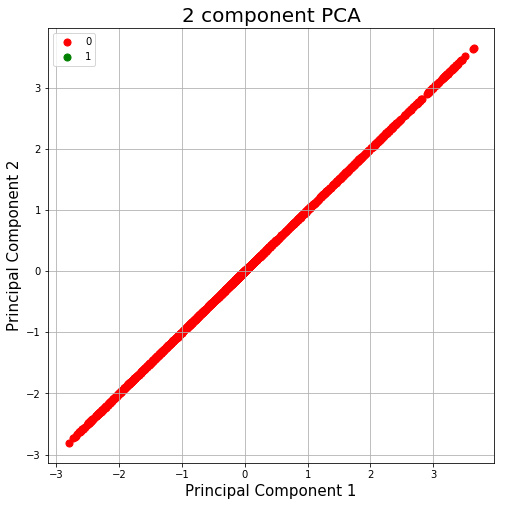

In [191]:
#Implementing PCA, we can increase n_components, but not sure if it's very helpful in this contex.
#(except for visualization).

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(tempx)
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
finalDf = pd.concat([principalDf, tempy], axis = 1)
principalDf = pd.DataFrame(data = principalComponents
             , columns =['Principal Component 1','Principal Component 2']);


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
color = ['r','g']
for target, color in zip(targets,color):
    indicesToKeep = finalDf.iloc[:,2] == target
    ax.scatter(principalDf.loc[indicesToKeep]
               , principalDf.loc[indicesToKeep]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [96]:
sum(pca.explained_variance_ratio_)

1.0

In [117]:

# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
# Gives an idea of feature importance, and is not dependent on the ML model being used.
y=np.asarray(y)
y=y.astype(int);
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
# summarize scores
numpy.set_printoptions(precision=3)
a=pd.DataFrame(X.columns,columns=['Feature'])
a['Importance Score']=pd.DataFrame(fit.scores_, columns=['Importance Score'])
a=a.sort_values(by='Importance Score', ascending=False)
#features = fit.transform(X)
# summarize selected features
a.head()

,Feature,Importance Score
6,Employees Affected,23170.843005
25,s1-Mobile Telecommunications,39.858287
38,s1-Web Development,31.993896
57,s2-Mobile Telecommunications,26.594169
12,s1-Electrical Engineering,24.547547


In [219]:
#To be continued...